## Задание
Цель: изучить применение дерева решений в рамках задачи регрессии

Описание задания:
В домашнем задании нужно решить задачу регрессии. В качестве датасета необходимо взять данные о недвижимости Калифорнии 

Целевая переменная – MedHouseVal. Прочитать информацию о признаках датасета можно, выполнив следующий код – print(fetch_california_housing().DESCR). 

На полученных данных построить модель регрессии и дерево решений.


Этапы работы:

1. Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую).
2. Проведите первичный анализ.

    a. Проверьте данные на пропуски. Удалите в случае обнаружения.

    b.*Нормализуйте один из признаков.

3. Разделите выборку на обучающее и тестовое подмножества. 80% данных оставить на обучающее множество, 20% - на тестовое.
4. Обучите модель регрессии на обучающем множестве.
    Для тестового множества предскажите целевую переменную и сравните с истинным значением, посчитав точность предсказания модели. Для этого используйте встроенную функцию score.
5. Обучите дерево решений на обучающем множестве.

    a. Повторите п. 5 для полученной модели.

    b. Визуализируйте часть дерева решений. Убедитесь, что график получился читабельным. Посмотрите примеры визуализации по ссылке.

6. Оптимизируйте глубину дерева (max_depth). *Оптимизируйте ещё один параметр модели на выбор.

    a. Повторите п. 5 для полученной модели.

7. Сформулируйте выводы по проделанной работе.

    a. Сравните точность двух моделей.
    
    b. Напишите свое мнение, для каких задач предпочтительнее использовать обученные в работе модели? Какие у них есть плюсы и минусы?


In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
 
from matplotlib import pyplot as plt
 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [1]:
from sklearn.datasets import fetch_california_housing

In [12]:
california = fetch_california_housing()

In [14]:
X = pd.DataFrame(california.data, columns=california.feature_names)
y = pd.DataFrame(california.target, columns=['MedHouseVal'])
data_california = pd.concat([X,y], axis=1)
data_california 

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


- MedInc медианный доход в группе блоков
- HouseAge медианный возраст дома в группе блоков
- AveRooms среднее количество комнат на домохозяйство
- AveBedrms среднее количество спален на домохозяйство
- Population численность группы блоков
- AveOccup среднее количество членов домохозяйства
- Latitude широта группы блоков
- Longitude долгота группы блоков

Этот набор данных был получен из переписи населения США 1990 года с использованием одной строки на группу блоков переписи.

Группа блоков — это наименьшая географическая единица, для которой Бюро переписи населения США публикует выборочные данные (группа блоков обычно имеет население от 600 до 3000 человек).

Домохозяйство — это группа людей, проживающих в доме. Поскольку среднее количество комнат и спален в этом наборе данных указано на домохозяйство, эти
столбцы могут принимать удивительно большие значения для групп блоков с небольшим количеством домохозяйств и большим количеством пустующих домов, таких как курорты.

In [18]:
data_california.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


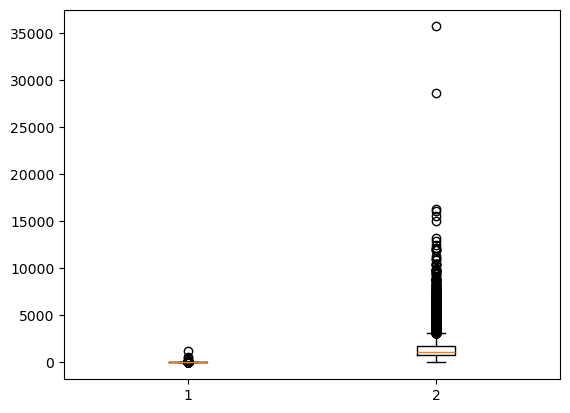

In [25]:
plt.boxplot(data_california[['AveOccup','Population']])
plt.show()

Поскольку население группы блоков находится в пределах 600-3000 человек, как сказано в описании к датасету, то все строки, в которых население превышает 3000, будем считать выбросами в данных и удалим их из датасета

In [27]:
data_california = data_california[data_california['Population'] <= 3000]

In [28]:
data_california.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,19283.000000,19283.000000,19283.000000,19283.000000,19283.000000,19283.000000,19283.000000,19283.000000,19283.000000
mean,3.864156,29.384743,5.442217,1.098472,1211.225847,2.917730,35.665447,-119.602962,2.072706
std,1.912680,12.404195,2.532615,0.489794,621.930370,1.071985,2.146684,2.006854,1.167761
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.556200,19.000000,4.454902,1.003953,764.000000,2.415365,33.940000,-121.820000,1.181000
50%,3.526800,30.000000,5.227778,1.048093,1114.000000,2.800000,34.270000,-118.540000,1.798000
75%,4.730400,38.000000,6.044971,1.099869,1581.000000,3.259482,37.730000,-118.030000,2.664000
max,15.000100,52.000000,141.909091,34.066667,2999.000000,63.750000,41.950000,-114.310000,5.000010


Проверка распределения признаков

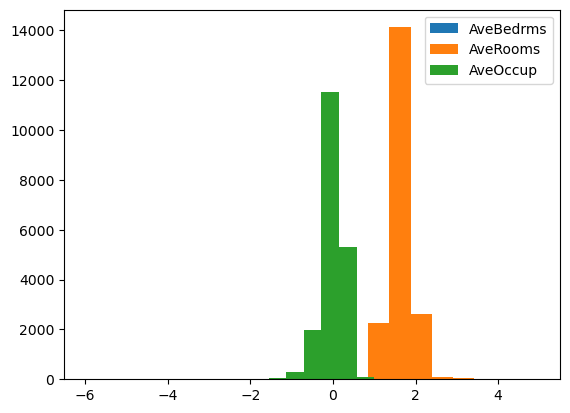

In [67]:
plt.hist(x = data_california['AveBedrms'],label='AveBedrms')
plt.hist(x=data_california['AveRooms'], label='AveRooms')
plt.hist(x=data_california['AveOccup'],label='AveOccup')
plt.legend()
plt.show()

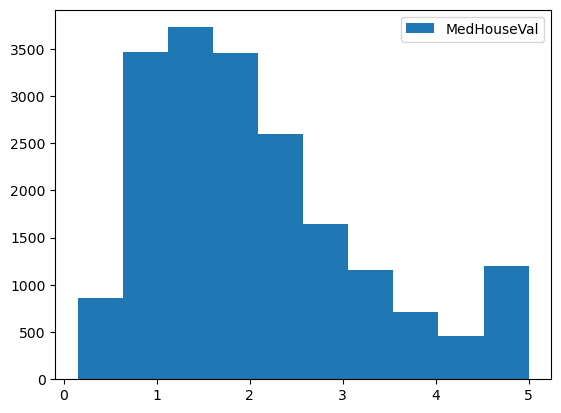

In [68]:
plt.hist(x = data_california['MedHouseVal'],label='MedHouseVal')
plt.legend()
plt.show()

Нормализуем признаки "AveOccup",'AveBedrms','AveRooms'

In [70]:
data_california['AveBedrms'] = np.log(data_california['AveBedrms'])
data_california['AveOccup'] = np.log(data_california['AveOccup'])
data_california['AveRooms'] = np.log(data_california['AveRooms'])

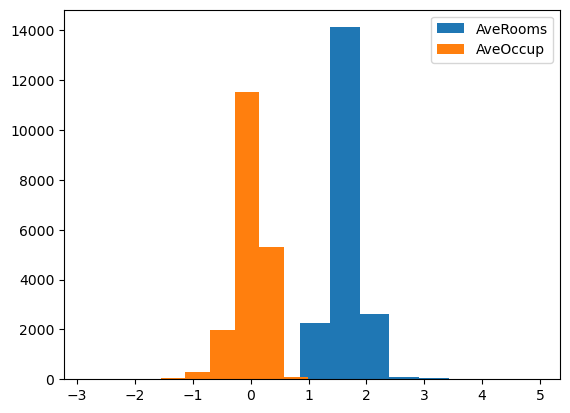

In [64]:
plt.hist(x=data_california['AveRooms'],label='AveRooms')
plt.hist(x=data_california['AveOccup'],label='AveOccup')
plt.legend()
plt.show()


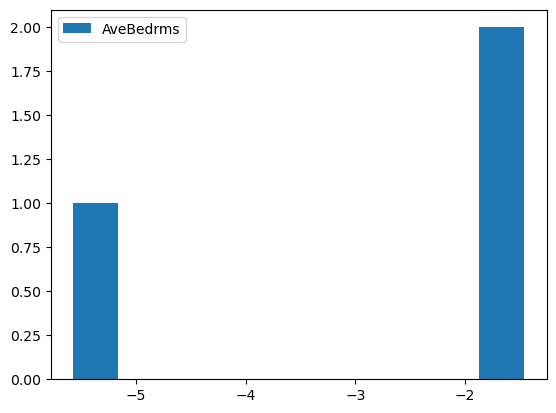

In [72]:
plt.hist(x=data_california['AveBedrms'],label='AveBedrms')
plt.legend()
plt.show()

Посмотрим матрицу корреляций, чтобы посмотреть, какие признаки слабо коррелируют с целевой переменной, и их можно откинуть при обучении модели

<Axes: >

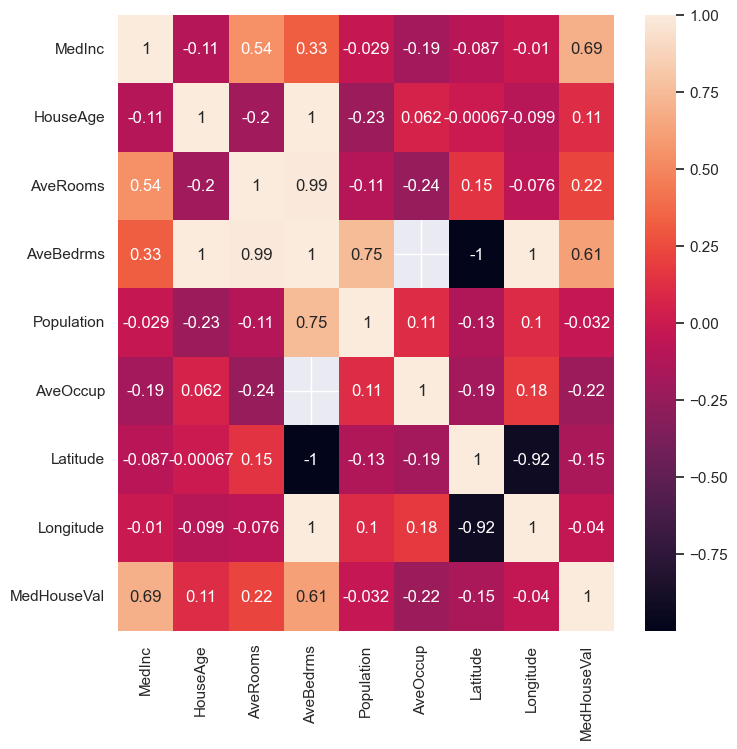

In [147]:
sns.set(rc={'figure.figsize':(8,8)})
sns.heatmap(data_california.corr(), annot=True)

Обучать модель будем на всех признаках, кроме долготы, населения

In [158]:
columns_drop = ['Population','Longitude',]
X_model = X.loc[:,~X.columns.isin(columns_drop)]


,MedInc,HouseAge,AveRooms,AveBedrms,AveOccup,Latitude
0,8.3252,41.0,6.984127,1.023810,2.555556,37.88
1,8.3014,21.0,6.238137,0.971880,2.109842,37.86
2,7.2574,52.0,8.288136,1.073446,2.802260,37.85
3,5.6431,52.0,5.817352,1.073059,2.547945,37.85
4,3.8462,52.0,6.281853,1.081081,2.181467,37.85
...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,2.560606,39.48
20636,2.5568,18.0,6.114035,1.315789,3.122807,39.49
20637,1.7000,17.0,5.205543,1.120092,2.325635,39.43
20638,1.8672,18.0,5.329513,1.171920,2.123209,39.43


Обучени модели линейной регрессии

In [159]:
X_train,X_test,y_train,y_test = train_test_split(X_model,y,test_size=0.2,random_state=42)

In [161]:
X_train.shape

(16512, 6)

In [162]:
model = LinearRegression()

In [163]:
model.fit(X_train,y_train)

LinearRegression()

In [170]:
pred = model.predict(X_test)
pred

array([[1.00013809],
       [1.57348585],
       [2.57969269],
       ...,
       [4.29575137],
       [1.48256426],
       [1.98579419]])

In [165]:
model.coef_

array([[ 0.5365226 ,  0.01625127, -0.21059361,  1.05644033, -0.0043759 ,
        -0.03075215]])

In [173]:
model.score(X_test,y_test)

0.5139049067587933

Обучение дерева решений 

In [174]:
from sklearn.tree import DecisionTreeRegressor

In [248]:
clf = DecisionTreeRegressor(max_depth=8, random_state=10,min_samples_split=200)

In [249]:
clf.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, min_samples_split=200, random_state=10)

In [250]:
clf_pred = clf.predict(X_test)

In [251]:
clf.score(X_test,y_test)

0.6492373268210128

In [206]:
score = {}
for i in range(1,17):
    score[f'depth={i}'] = DecisionTreeRegressor(max_depth=i, random_state=10).fit(X_train,y_train)
    score[f'score_depth={i}'] = DecisionTreeRegressor(max_depth=i, random_state=10).fit(X_train,y_train).score(X_test,y_test)

score


{'depth=1': DecisionTreeRegressor(max_depth=1, random_state=10),
 'score_depth=1': 0.27951121634638154,
 'depth=2': DecisionTreeRegressor(max_depth=2, random_state=10),
 'score_depth=2': 0.4244060273337802,
 'depth=3': DecisionTreeRegressor(max_depth=3, random_state=10),
 'score_depth=3': 0.5097629887358219,
 'depth=4': DecisionTreeRegressor(max_depth=4, random_state=10),
 'score_depth=4': 0.5540288505085005,
 'depth=5': DecisionTreeRegressor(max_depth=5, random_state=10),
 'score_depth=5': 0.5972742531192514,
 'depth=6': DecisionTreeRegressor(max_depth=6, random_state=10),
 'score_depth=6': 0.6158994500071111,
 'depth=7': DecisionTreeRegressor(max_depth=7, random_state=10),
 'score_depth=7': 0.63349445361786,
 'depth=8': DecisionTreeRegressor(max_depth=8, random_state=10),
 'score_depth=8': 0.6410505214617208,
 'depth=9': DecisionTreeRegressor(max_depth=9, random_state=10),
 'score_depth=9': 0.6389866849583714,
 'depth=10': DecisionTreeRegressor(max_depth=10, random_state=10),
 'score

Самый высокая точность предсказания модели наблюдается при глубине дерева в 8 узлов. 

Оптимизируем минимальное число объектов, при котором узел не разбивается, а становится листом

In [268]:
min_samples = {}
for i in range(2,5000,100):
    min_samples[f'min_samples={i}'] = DecisionTreeRegressor(max_depth=8, random_state=10,min_samples_split=i).fit(X_train,y_train)
    min_samples[f'score_min_samples={i}'] = DecisionTreeRegressor(max_depth=8, random_state=10,min_samples_split=i).fit(X_train,y_train).score(X_test,y_test)
min_samples

{'min_samples=2': DecisionTreeRegressor(max_depth=8, random_state=10),
 'score_min_samples=2': 0.6410505214617208,
 'min_samples=102': DecisionTreeRegressor(max_depth=8, min_samples_split=102, random_state=10),
 'score_min_samples=102': 0.652521354980858,
 'min_samples=202': DecisionTreeRegressor(max_depth=8, min_samples_split=202, random_state=10),
 'score_min_samples=202': 0.6492373268210128,
 'min_samples=302': DecisionTreeRegressor(max_depth=8, min_samples_split=302, random_state=10),
 'score_min_samples=302': 0.6387864002484286,
 'min_samples=402': DecisionTreeRegressor(max_depth=8, min_samples_split=402, random_state=10),
 'score_min_samples=402': 0.625529019072967,
 'min_samples=502': DecisionTreeRegressor(max_depth=8, min_samples_split=502, random_state=10),
 'score_min_samples=502': 0.6241259841511952,
 'min_samples=602': DecisionTreeRegressor(max_depth=8, min_samples_split=602, random_state=10),
 'score_min_samples=602': 0.6174746717045625,
 'min_samples=702': DecisionTreeReg

Оптимальным является параметр min_samples = 102. Примем, что оптимальным является параметр min_samples = 100.

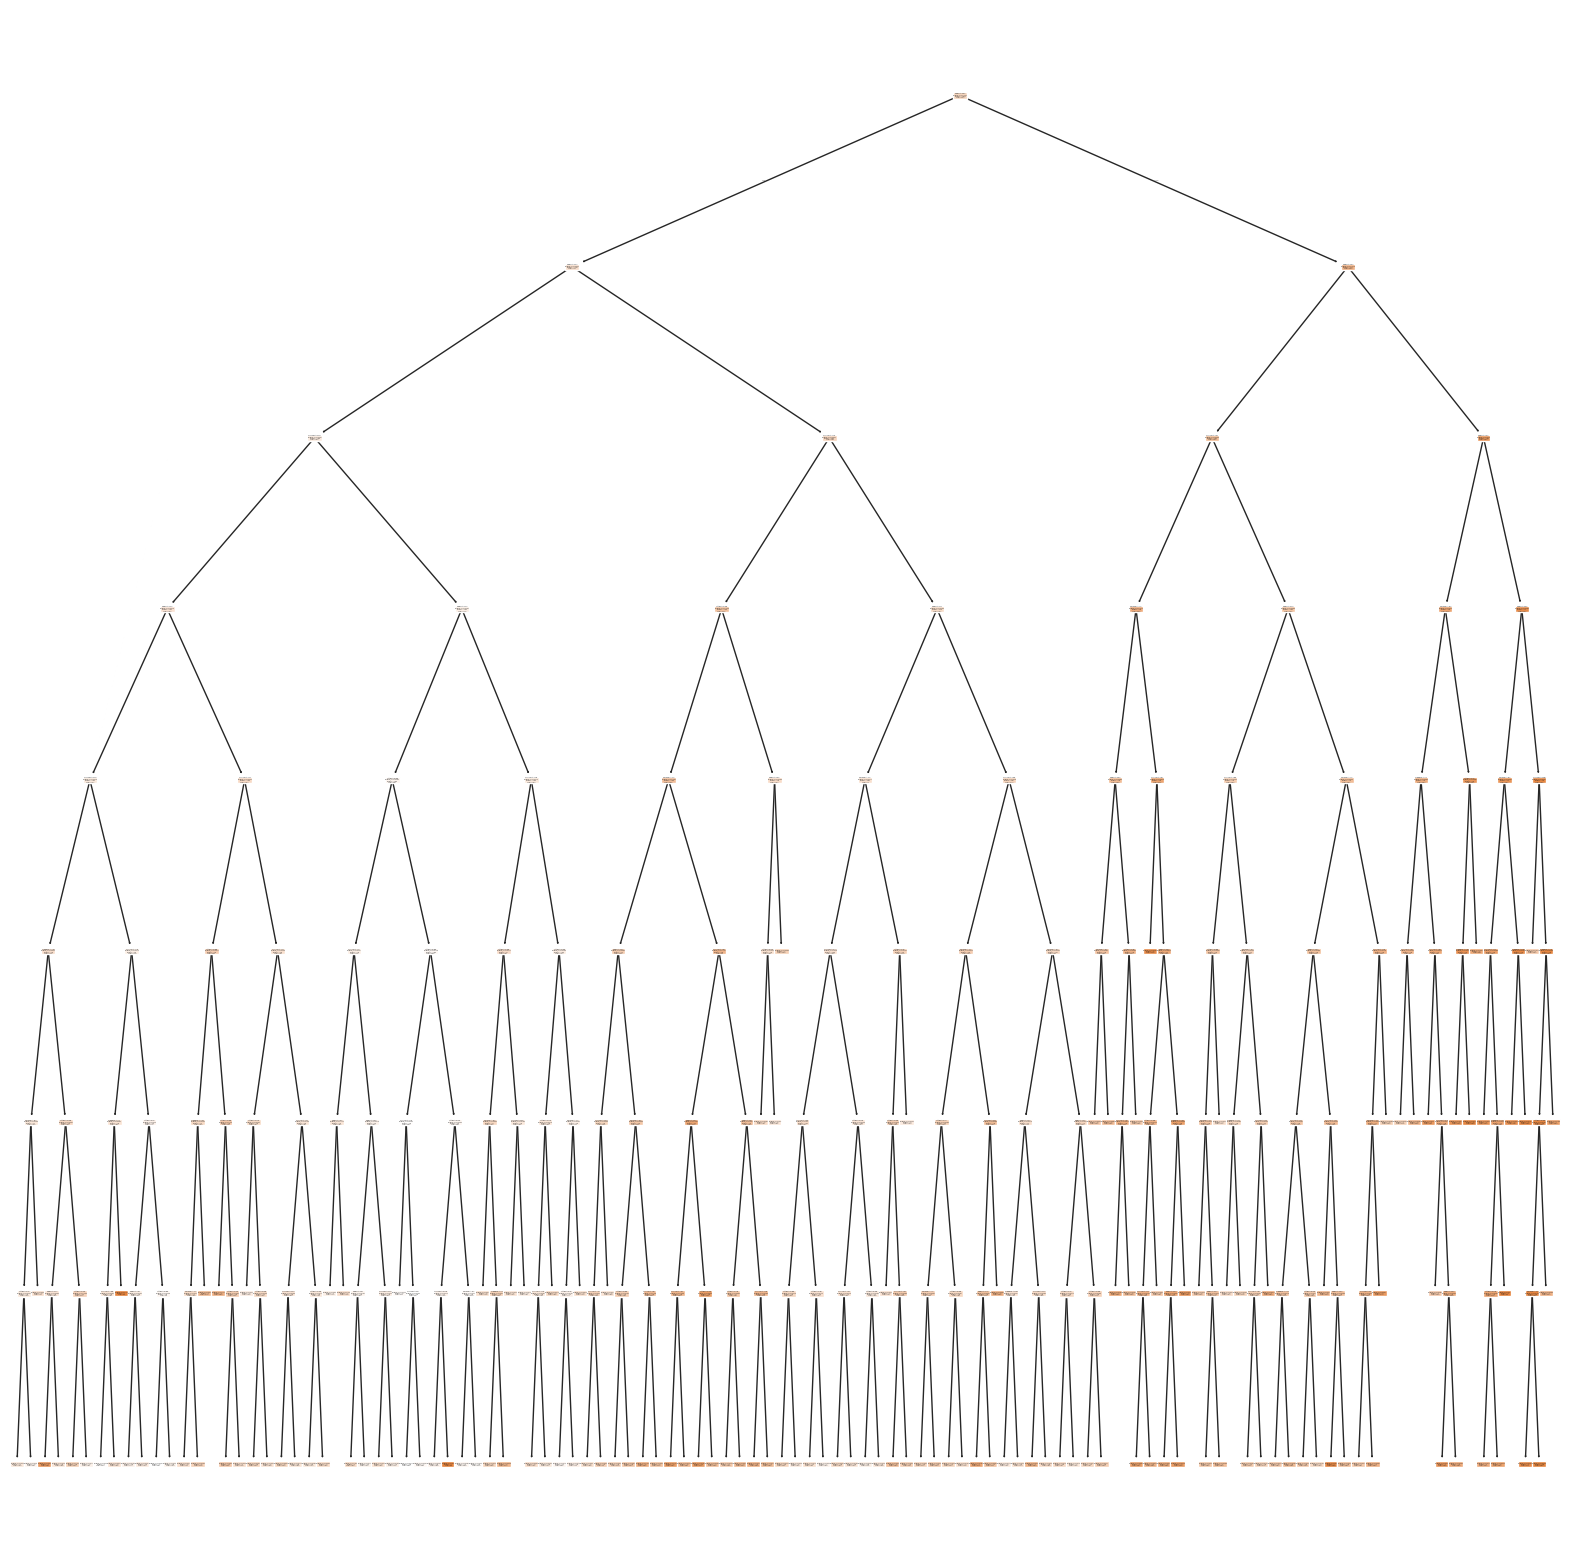

In [275]:
dt = DecisionTreeRegressor(max_depth=8,random_state=42,min_samples_split=100).fit(X_train,y_train)
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 20))
plot_tree(dt, feature_names=X_test.columns, filled=True)
plt.show()

Видно только структура дерева решений, а узлы и листья - нет. Попробуем посмотреть на дерево решений с глубиной 3

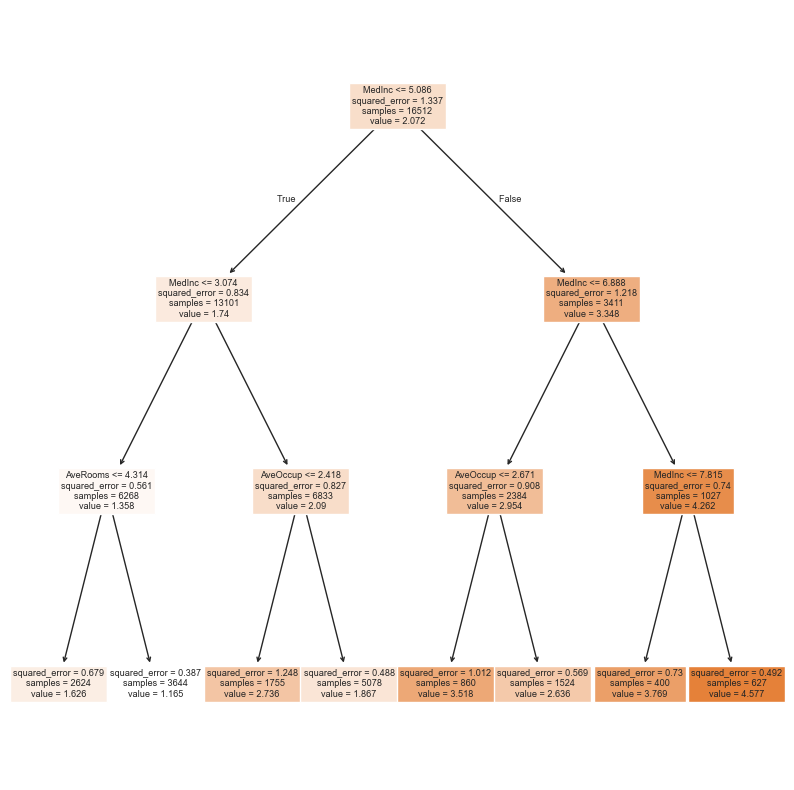

In [276]:
dt = DecisionTreeRegressor(max_depth=3,random_state=42,min_samples_split=100).fit(X_train,y_train)
from sklearn.tree import plot_tree

plt.figure(figsize=(10, 10))
plot_tree(dt, feature_names=X_test.columns, filled=True,)
plt.show()

Вывод: в данном Ноутбуке было проведено обучение двух моделей для задачи регрессии - модели линейной регрессии и дерева решений. Было определено, что дерево решений в данной задаче показало большую точность предсказания целевой переменной, чем линейная регрессия. Причем, этого удалось добиться, изменяя параметры построения дерева - начиналось построени с глубины 2, а в ходе оценки точностей предсказания было выяснено, что максимально возможной точностью в 65% обладает дерево с глубиной 8. Кроме того, удалось повысить точность при помощи добавление параметра "минимально количество объектов для разбиения", она, конечно, повысилась не намного (около 1 процента), но тем не менее повышение есть. В данной задаче ни одна из моделей не показала хорошую точность предсказания, возможно, это связано с тем, что обучение модели происходило на нескольких признаках, за счет чего точность могла понизиться.